Environment (beginning)

1.0	1.0	1.0	1.0	1.0	1.0	1.0
1.0	0	2	0	0	0	1.0
1.0	2	0	0	0	0	1.0
1.0	0	0	0	0	0	1.0
1.0	2	2	0	0	0	1.0
1.0	2	0	0	0	0	1.0
1.0	1.0	1.0	1.0	1.0	1.0	1.0


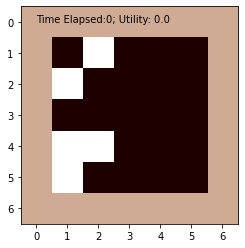

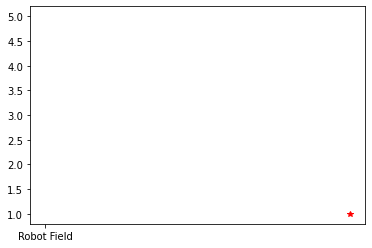

-14.0
down


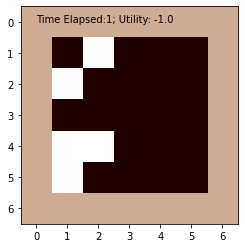

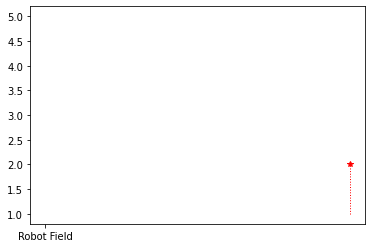

clean


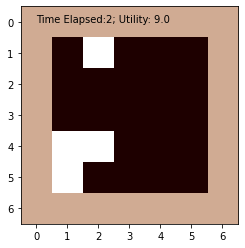

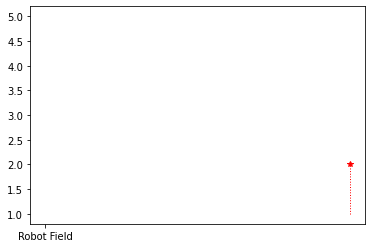

down


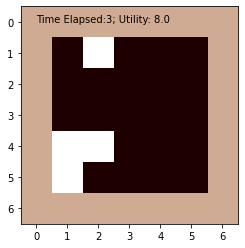

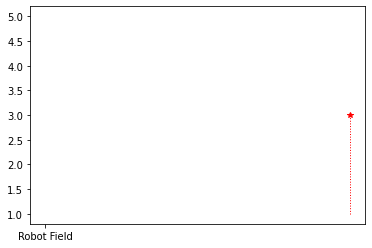

down


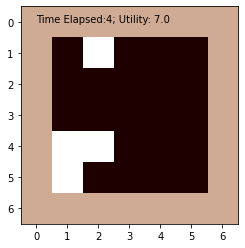

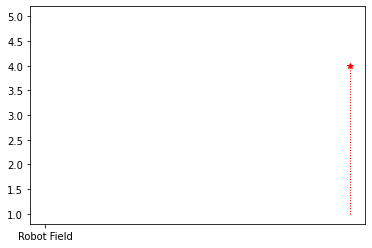

clean


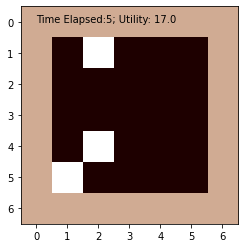

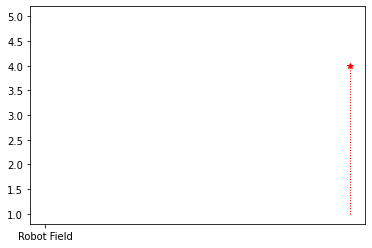

down


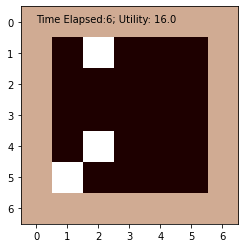

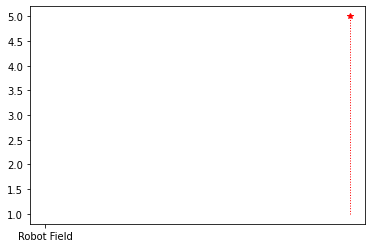

clean


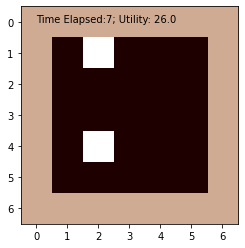

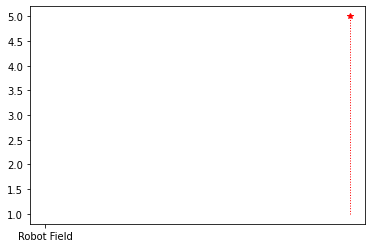

right


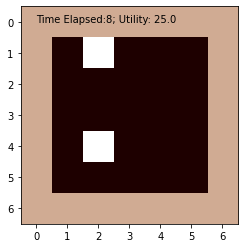

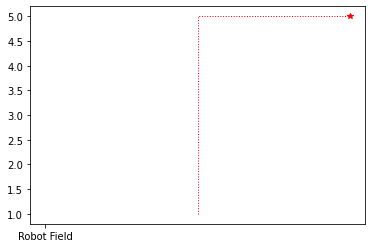

up


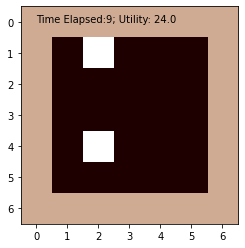

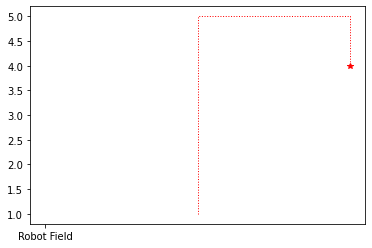

clean


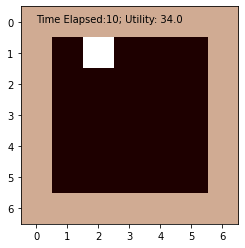

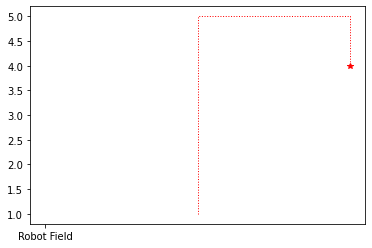

up


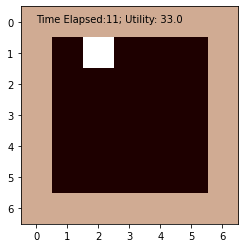

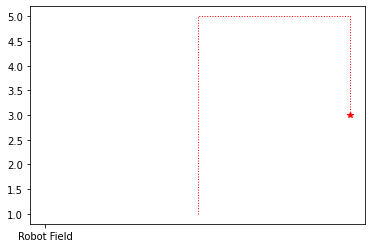

up


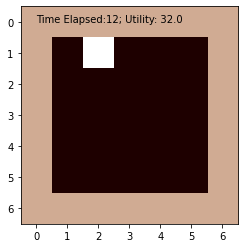

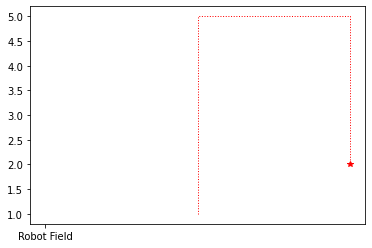

up


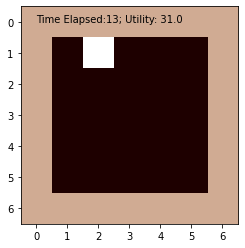

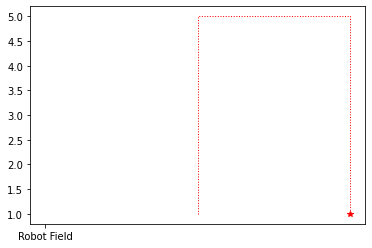

clean


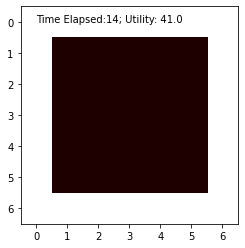

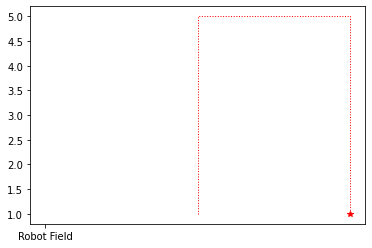

right


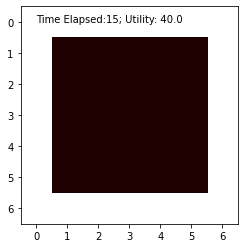

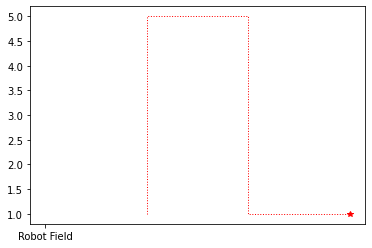

down


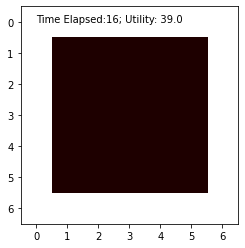

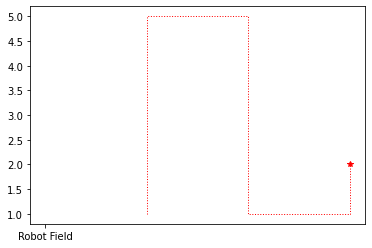

down


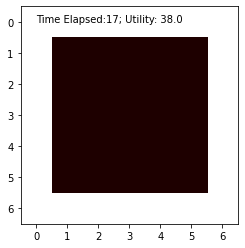

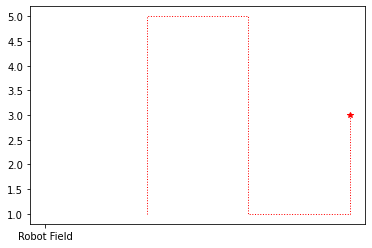

down


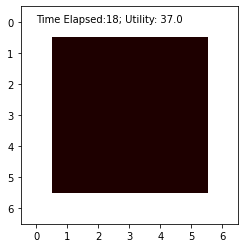

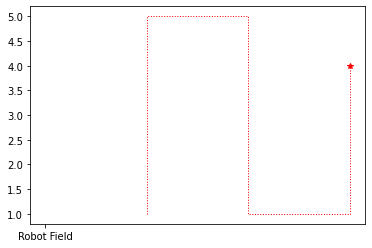

down


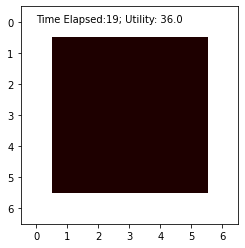

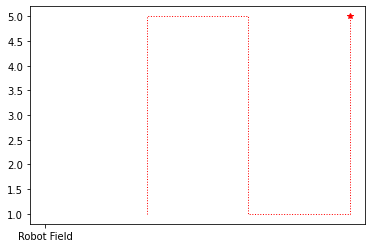

right


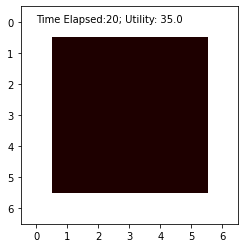

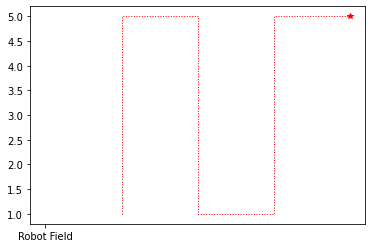

up


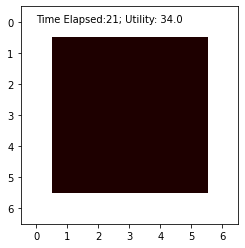

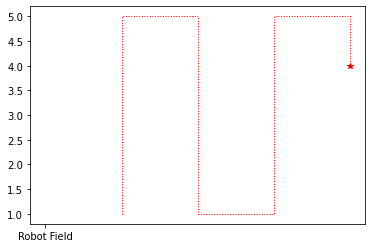

up


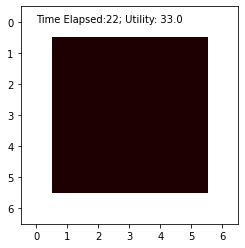

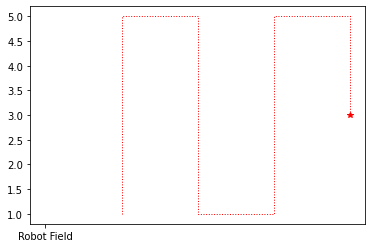

up


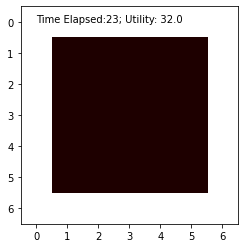

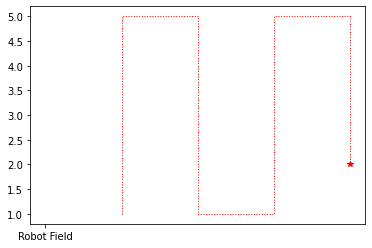

up


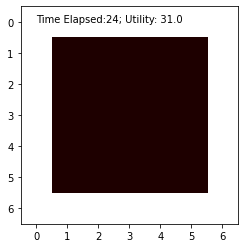

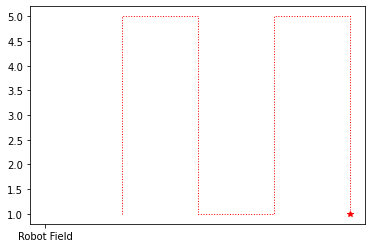

right


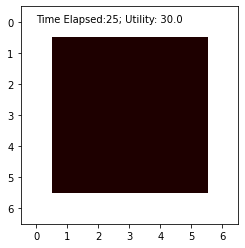

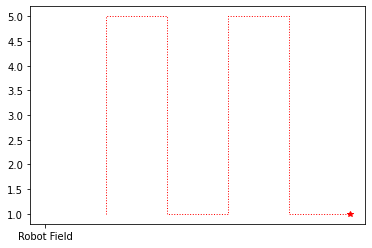

down


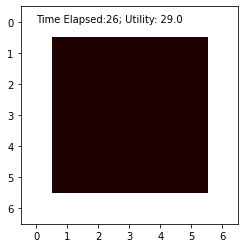

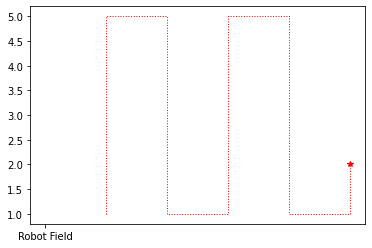

down


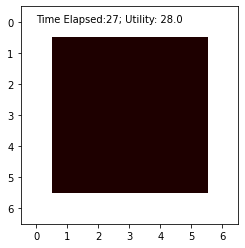

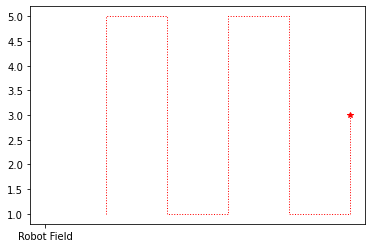

down


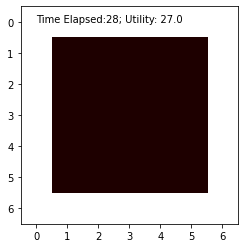

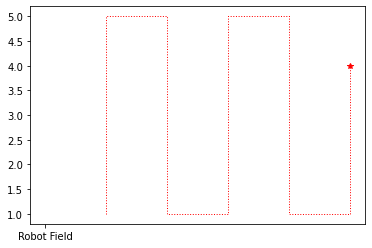

down


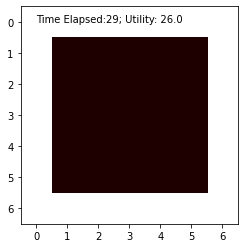

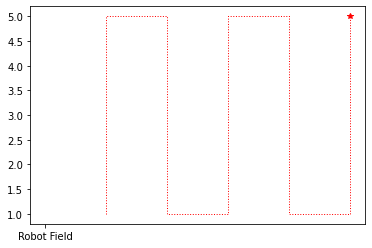

end
Environment (ending): 26.000000

1.0	1.0	1.0	1.0	1.0	1.0	1.0
1.0	0	0	0	0	0	1.0
1.0	0	0	0	0	0	1.0
1.0	0	0	0	0	0	1.0
1.0	0	0	0	0	0	1.0
1.0	0	0	0	0	0	1.0
1.0	1.0	1.0	1.0	1.0	1.0	1.0


<Figure size 432x288 with 0 Axes>

In [1]:


# Reflex Vacuum Cleaner Agent. Agent makes random move (-1 for each move, and +10 for clean a spot)

import matplotlib.pyplot as plt
import numpy as np
import random


# 0 -> clean
# 1 -> wall
# 2 -> dirt
# The original matrix contains probablty values which will be used to generte the environment.
# if you want to make a spot to have dirt for sure, set the value as 1.0
# if you do NOT want to make a spot to have dirt, set the value as 0
matrix = [
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.1, 0.1, 0.1, 0.4, 0.4, 1.0],
    [1.0, 0.1, 0.1, 0.1, 0.6, 0.4, 1.0], 
    [1.0, 0.1, 0.4, 0.1, 0.1, 0.1, 1.0], 
    [1.0, 0.4, 0.6, 0.4, 0.1, 0.1, 1.0],
    [1.0, 0.1, 0.4, 0.1, 0.1, 0.1, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
]

# Actions Matrix -> represents the action for each position
# Actions = up (0), down (1), left (2), right (3), clean(4), end (5)
actionsMatrix = [
    [9, 9, 9, 9, 9, 9, 9],
    [9, 1, 3, 1, 3, 1, 9],
    [9, 1, 0, 1, 0, 1, 9], 
    [9, 1, 0, 1, 0, 1, 9], 
    [9, 1, 0, 1, 0, 1, 9],
    [9, 3, 0, 3, 0, 5, 9],    
    [9, 9, 9, 9, 9, 9, 9]
]

def renderMatrix(matrix,x,y,utility,timeElapsed):
    plt.text(0,0,"Time Elapsed:%d; Utility: %.1f"%(timeElapsed,utility))    
    plt.imshow(matrix, 'pink')
    plt.show(block=False)
    plt.plot(y,x,'r:',linewidth=1)
    plt.plot(y[len(y)-1], x[len(x)-1], '*r', 'Robot Field', 5)
    plt.pause(0.5)
    plt.clf()

def createWorld(m):
    for mI in range(1, 6):
        for aI in range(1, 6):
            if (random.random()<m[mI][aI]):
                m[mI][aI] = 2
            else:
                m[mI][aI] = 0
    #renderMatrix(matrix)

def findNextAction(x, y):
  return actionsMatrix[x][y]

# decides which action will be done
# Actions = up (0), down (1), left (2), right (3), clean(4)
def modelAgentRobot(x, y):
  if (matrix[x][y] == 2): # if it's dirty, return the clean action
    return 4
  return findNextAction(x, y)

def checkDirtSpots(matrix):
  x=len(matrix)
  totalones=2*x+(x-2)*2
  sum=np.sum(matrix)-totalones*2
  return(sum)

def main():
  createWorld(matrix)
  print("Environment (beginning)\r\n")
  print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
  # The robot always starts at matrix[1][1]
  currLine = 1
  currCol = 1
  Lines=[]
  Cols=[]
  Lines.append(currLine) 
  Cols.append(currCol)
  utility=0
  timeElapsed=0
  renderMatrix(matrix,Lines,Cols,utility,timeElapsed)
  totalDirt=checkDirtSpots(matrix)
  print(totalDirt)
  while True:
    action = modelAgentRobot(currLine, currCol)
    if (action == 0): # go up
      print("up")
      currLine = currLine - 1 # remove 1 line
      utility=utility-1
    elif (action == 1): # go down
      print("down")
      currLine = currLine + 1
      utility=utility-1        
    elif (action == 2): # go left
      print("left")
      currCol = currCol - 1
      utility=utility-1        
    elif (action == 3): # go right
      print("right")
      currCol = currCol + 1
      utility=utility-1        
    elif (action == 4): # clean
      print("clean")
      matrix[currLine][currCol] = 0
      utility=utility+10        
    else:
      print("end")
      break
    Lines.append(currLine) 
    Cols.append(currCol)
    timeElapsed=timeElapsed+1    
    renderMatrix(matrix,Lines,Cols,utility,timeElapsed)
  print("Environment (ending): %f\r\n"%utility)
  print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
  



if __name__ == "__main__":
  main()
